In [11]:
#Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
# 1. Load the data
df = pd.read_csv("churn-bigml-80.csv")

In [13]:
df.groupby('Churn').describe()

Account length                                                          \
               count        mean        std  min    25%    50%    75%    max   
Churn                                                                          
False         2278.0  100.330992  39.458936  1.0  73.00  100.0  127.0  243.0   
True           388.0  102.319588  40.184599  1.0  75.75  103.0  127.0  225.0   

      Area code              ... Total intl charge       \
          count        mean  ...               75%  max   
Churn                        ...                          
False    2278.0  437.420983  ...            3.2400  5.1   
True      388.0  437.543814  ...            3.4875  5.4   

      Customer service calls                                               
                       count      mean       std  min  25%  50%  75%  max  
Churn                                                                      
False                 2278.0  1.453029  1.152125  0.0  1.0  1.0  2.0  7.0  
True                   388.0  2.206186  1.882536  0.0  1.0  2.0  4.0  9.0  

[2 rows x 128 columns]

In [14]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [16]:
# 2. Data Cleaning and Preprocessing
# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [17]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   int64  
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   int64  
 4   Voice mail plan         2666 non-null   int64  
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [18]:
# Feature-target split
X = df.drop('Churn', axis=1)  # Assuming 'Churn' is the target column
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Model Selection and Training
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 4. Model Evaluation
lr_predictions = lr_model.predict(X_test)
lr_accuracy=accuracy_score(y_test, lr_predictions)
print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))

# Random Forest evaluation
rf_predictions = rf_model.predict(X_test)
rf_accuracy=accuracy_score(y_test, rf_predictions)
print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))




Logistic Regression:
Accuracy: 0.8595505617977528
Confusion Matrix:
 [[441  14]
 [ 61  18]]
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.97      0.92       455
        True       0.56      0.23      0.32        79

    accuracy                           0.86       534
   macro avg       0.72      0.60      0.62       534
weighted avg       0.83      0.86      0.83       534

Random Forest:
Accuracy: 0.951310861423221
Confusion Matrix:
 [[455   0]
 [ 26  53]]
Classification Report:
               precision    recall  f1-score   support

       False       0.95      1.00      0.97       455
        True       1.00      0.67      0.80        79

    accuracy                           0.95       534
   macro avg       0.97      0.84      0.89       534
weighted avg       0.95      0.95      0.95       534



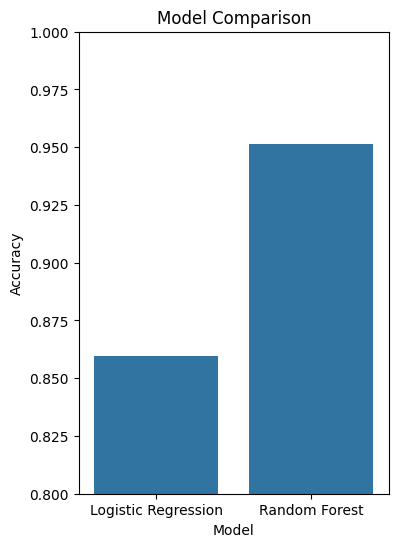

In [19]:
#Comparison Of Models
performance=pd.DataFrame({'Model':['Logistic Regression','Random Forest'],'Accuracy':[lr_accuracy,rf_accuracy]})

plt.figure(figsize=(4,6))
sns.barplot(x='Model',y='Accuracy',data=performance)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8,1)
plt.show()

# **Storing and Loading Models**

In [23]:
import joblib

joblib.dump(rf_model,"Random_Forest_churnPredictor")
joblib.dump(lr_model,"Linear_Regression_churnPredictor")

['Linear_Regression_churnPredictor']

In [24]:
rf_model_loaded=joblib.load("Random_Forest_churnPredictor")
lr_model_loaded=joblib.load("Linear_Regression_churnPredictor")

In [27]:
# Load the pre-trained model and scaler
model = joblib.load('Random_Forest_churnPredictor')

# Create a LabelEncoder instance for categorical variables
state_encoder = LabelEncoder()

all_states = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
              'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
              'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

# Fit the encoder on all states
state_encoder.fit(all_states)

# Function to predict churn
def predict_churn(State, Account_length, Area_code, International_plan, Voice_mail_plan, Number_vmail_messages,
                  Total_day_minutes, Total_day_calls, Total_day_charge, Total_eve_minutes, Total_eve_calls,
                  Total_eve_charge, Total_night_minutes, Total_night_calls, Total_night_charge, Total_intl_minutes,
                  Total_intl_calls, Total_intl_charge, Customer_service_calls):

    # Encode the 'State' using label encoding
    encoded_state = state_encoder.transform([State])[0]

    # Convert 'International plan' and 'Voice mail plan' to binary (1/0)
    international_plan_encoded = 1 if International_plan == 'yes' else 0
    voice_mail_plan_encoded = 1 if Voice_mail_plan == 'yes' else 0

    # Create a DataFrame for the input
    data = pd.DataFrame({
        'State': [encoded_state],
        'Account length': [Account_length],
        'Area code': [Area_code],
        'International plan': [international_plan_encoded],
        'Voice mail plan': [voice_mail_plan_encoded],
        'Number vmail messages': [Number_vmail_messages],
        'Total day minutes': [Total_day_minutes],
        'Total day calls': [Total_day_calls],
        'Total day charge': [Total_day_charge],
        'Total eve minutes': [Total_eve_minutes],
        'Total eve calls': [Total_eve_calls],
        'Total eve charge': [Total_eve_charge],
        'Total night minutes': [Total_night_minutes],
        'Total night calls': [Total_night_calls],
        'Total night charge': [Total_night_charge],
        'Total intl minutes': [Total_intl_minutes],
        'Total intl calls': [Total_intl_calls],
        'Total intl charge': [Total_intl_charge],
        'Customer service calls': [Customer_service_calls]
    })

    # Scale the data
    data_scaled = scaler.transform(data)

    # Predict churn
    prediction = model.predict(data_scaled)
    prediction_proba = model.predict_proba(data_scaled)

    # Print the prediction
    print("Churn Prediction: ", "Yes" if prediction[0] == 1 else "No")
    print("Probability of Churn: ", prediction_proba[0][1])

    return prediction[0], prediction_proba[0][1]





Churn Prediction:  No
Probability of Churn:  0.04


(False, 0.04)

In [28]:
predict_churn('KS', 128, 415, 'no', 'yes', 25, 265.1, 110, 45.07, 197.4, 99, 16.78, 244.7, 91, 11.01, 10, 3, 2.7, 1)
predict_churn('IN', 117, 415, 'no', 'no', 0, 118.4, 126, 20.13, 249.3, 97, 21.19, 227, 56, 10.22, 13.6, 3, 3.67, 5)

Churn Prediction:  No
Probability of Churn:  0.06
Churn Prediction:  Yes
Probability of Churn:  0.8


(True, 0.8)